In [1]:
import urllib
link = "https://community.smartthings.com/t/public-calendar-for-smartthings-developer-events/10209"
file = urllib.request.urlopen(link)
data = file.read()
import re
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time
import pickle

import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

import plotly
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

url = "https://community.smartthings.com/t/public-calendar-for-smartthings-developer-events/10209"

uClient = requests.get(url)
soup = BeautifulSoup(uClient.text, "html.parser")
print(soup)
#nltk.download()

<!DOCTYPE html>

<html lang="en-US">
<head>
<meta charset="utf-8"/>
<title>Public calendar for SmartThings developer events - Groups &amp; Events - SmartThings Community</title>
<meta content="Dear community, 

In 2015, we&amp;#39;re going to do a better job of event planning. If you want to keep up with which events are sponsoring and participating in, add this Google Calendar to your account: 




Google Calendar 


&amp;hellip;" name="description"/>
<meta content="Discourse 2.5.0.beta5 - https://github.com/discourse/discourse version c8370b9c78df1161aa3db2699bbd53c3e04b9925" name="generator"/>
<link href="https://aws1.discourse-cdn.com/smartthings/optimized/3X/7/1/716336ba8239a791818b9d1c5b2ef237659d45a3_2_32x32.png" rel="icon" type="image/png"/>
<link href="https://aws1.discourse-cdn.com/smartthings/optimized/3X/6/0/60303ee32d0ca0a0624ac0b757ea61a67d895f34_2_180x180.png" rel="apple-touch-icon" type="image/png"/>
<meta content="#ededf5" name="theme-color"/>
<meta content="width=devi

In [2]:
# Remove html
def remove_html(text):
    soup = BeautifulSoup(text, 'lxml')
    html_free = soup.get_text()
    return html_free

def remove_punc(text):
    no_punc = "".join([c for c in text if c not in string.punctuation]) 
    return no_punc

# Remove Stopwords
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words

# Lemmatizer
lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize(i) for i in text]
    return lem_text

# Stemmer
stemmer = PorterStemmer()

def word_stemmer(text):
    stem_text = [stemmer.stem(i) for i in text]
    return stem_text

In [3]:
import re
gruber = re.compile(r"""(?i)\b((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)/)(?:[^\s()<>{}\[\]]+|\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\))+(?:\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’])|(?:(?<!@)[a-z0-9]+(?:[.\-][a-z0-9]+)*[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)\b/?(?!@)))""")


In [4]:
containers = soup.findAll("div", {"class":"topic-body crawler-post"})

In [5]:
import pandas as pd
df = pd.DataFrame(columns=['username', 'message'])

In [8]:
index = 0

for container in containers:
    
    user_container = container.findAll("span", {"itemprop":"name"})
    username = user_container[0].text
    #print(username)
    
    msg_container = container.findAll("div", {"class":"post"})
    temp_message = msg_container[0].text
    #print(remove_html(message))
    temp_message = remove_html(temp_message)
    message = temp_message.replace("\n","").replace("we’re","we are").replace("I’ll","I will").replace("https "," https").replace(":http"," http").replace("community,In","community In")
    
    #remove punctuation from non-URLs in messages
    split_message = gruber.split(message)
    for i in range(0, len(split_message), 2):
        split_message[i] = remove_punc(split_message[i])
    
    final_message = "".join(split_message)
    df.loc[index] = [username.lower()] + [(' '.join(final_message.split())).lower()]
    
    index += 1
    
print(df)


              username                                            message
0                mager  dear community in 2015 we are going to do a be...
1             tgauchat  can “anyone” join this thursday call or on loc...
2                mager             tgauchat http://devguild.heavybit.com/
3             tgauchat  mager http://devguild.heavybit.com/thanks i wi...
4                 greg                        can you post a url for ical
5            copyninja  ical feed https://www.google.com/calendar/ical...
6                mager  greg https://www.google.com/calendar/ical/phys...
7                twack  mager any st’rs going to treehack my son is si...
8                mager                 yep we want to make it a big event
9                april                                                   
10  automateeverything  sounds fantastic i look forward to hopefully s...
11              kelchm  would it be possible to fix the duplicate entr...
12               april  kelchm thanks 

In [9]:
#print(df['message'])


for i in range(14):
    df['message'][i] = re.split(r'\s{1,}', df['message'][i])


df['message'] = df['message'].apply(lambda x: remove_stopwords(x))
df['message'] = df['message'].apply(lambda x: word_stemmer(x))
print(df)


              username                                            message
0                mager  [dear, commun, 2015, go, better, job, event, p...
1             tgauchat  [“anyone”, join, thursday, call, locat, heavyb...
2                mager          [tgauchat, http://devguild.heavybit.com/]
3             tgauchat  [mager, http://devguild.heavybit.com/thank, pe...
4                 greg                                  [post, url, ical]
5            copyninja  [ical, feed, https://www.google.com/calendar/i...
6                mager  [greg, https://www.google.com/calendar/ical/ph...
7                twack             [mager, st’r, go, treehack, son, sign]
8                mager                      [yep, want, make, big, event]
9                april                                                 []
10  automateeverything  [sound, fantast, look, forward, hope, see, nor...
11              kelchm     [would, possibl, fix, duplic, entri, calendar]
12               april               [

In [10]:
df['username'].iplot(kind='hist', xTitle='username', linecolor='black', yTitle='posts', title='Activity per username')
#df['message'].iplot(kind='hist', xTitle='word', linecolor='black', yTitle='count', title='Word Count of Text in Messages')

dear
commun
2015
go
better
job
event
plan
want
keep
event
sponsor
particip
add
googl
calendar
account
googl
calendarpleas
repli
thread
suggest
event
want
us
particip
inalso
build
ambassador
program
let
repres
us
hackathon
meetup
develop
event
“anyone”
join
thursday
call
locat
heavybit
industri
inc
325
9th
street
san
francisco
ca
94103
unit
statesthanks…t
tgauchat
http://devguild.heavybit.com/
mager
http://devguild.heavybit.com/thank
pencil
tri
jointh
share
calendar
great
idea…cp
terri
post
url
ical
ical
feed
https://www.google.com/calendar/ical/physicalgraph.com_i84rmh4o3ca9a8sjr3skq86v4o%40group.calendar.google.com/public/basic.
greg
https://www.google.com/calendar/ical/physicalgraph.com_i84rmh4o3ca9a8sjr3skq86v4o%40group.calendar.google.com/public/basic.
mager
st’r
go
treehack
son
sign
yep
want
make
big
event

sound
fantast
look
forward
hope
see
north
uk
time
come
would
possibl
fix
duplic
entri
calendar
kelchm
thank
call
fix
nowcheer
perhap
use
calendar
commun
plan
mainten
link
maint

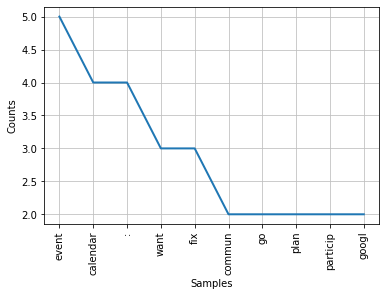

In [11]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
#nltk.download('punkt')

all_text = ""
for message in df['message']:
    for word in message:
        all_text += word + " "
        print(word)

tokenized_word = word_tokenize(all_text)
#print(tokenized_word)
fdist = FreqDist(tokenized_word)

fdist.plot(10,cumulative=False)
plt.show()
